# Import Lib

In [ ]:
#Importing libraries required for the case study and to plot charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Regular Expressions for String manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
# Import các thư viện cần thiết từ TensorFlow/Keras
#import tensorflow as tf
#from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
#from tensorflow.keras.models import Model
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.metrics import AUC


In [ ]:
!pip install -q hvplot
!pip install openpyxl
!pip install keras-tuner
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# Load data loan.csv

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/loan-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.39M/8.39M [00:00<00:00, 48.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhishek14398/loan-dataset/versions/1


# Mô tả bài toán

Trong bài toán này, ta sẽ áp dụng các kỹ thuật khám phá dữ liệu (EDA) và sử dụng các mô hình Machine Learning để giải quyết một bài toán thực tế về phân tích rủi ro trong lĩnh vực tài chính và ngân hàng. Mục tiêu là sử dụng dữ liệu và mô hình một cách hiệu quả để dự đoán khả năng vỡ nợ của khách hàng, qua đó hỗ trợ các quyết định kinh doanh.

Công ty tài chính mà ta làm việc chuyên cung cấp các khoản vay cho khách hàng đô thị. Khi nhận được một hồ sơ vay, công ty cần quyết định phê duyệt dựa trên thông tin khách hàng, đối mặt với hai loại rủi ro chính:

  - Mất cơ hội kinh doanh: Nếu khách hàng có khả năng trả nợ nhưng không được duyệt hồ sơ.

  - Tổn thất tài chính: Nếu khách hàng không có khả năng trả nợ nhưng hồ sơ được duyệt.

Dữ liệu hiện có chứa thông tin về các khách hàng trong quá khứ và trạng thái vỡ nợ của họ (có hoặc không). Ta cần phân tích dữ liệu để tìm ra các mẫu dự đoán khả năng vỡ nợ, từ đó hỗ trợ các quyết định kinh doanh như:

  - Từ chối khoản vay.

  - Điều chỉnh số tiền vay.

  - Áp dụng lãi suất cao hơn với khách hàng có nguy cơ rủi ro cao.

  

**Khi một người nộp đơn xin vay vốn, công ty có thể đưa ra hai loại quyết định:**


1. Duyệt khoản vay:
Nếu khoản vay được duyệt, có thể xảy ra một trong ba trường hợp:

  - Hoàn tất thanh toán: Khách hàng đã trả hết tiền gốc và lãi suất.
  
  - Đang trả góp: Khách hàng vẫn đang trả nợ, nghĩa là kỳ hạn khoản vay chưa kết thúc. Những khách hàng này không bị xem là vỡ nợ.

  - Vỡ nợ: Khách hàng không thanh toán đúng hạn trong thời gian dài, dẫn đến tình trạng vỡ nợ.

2. Từ chối khoản vay:

Nếu khoản vay bị từ chối (do không đáp ứng các yêu cầu của công ty), sẽ không có bất kỳ lịch sử giao dịch nào giữa khách hàng và công ty. Vì vậy, dữ liệu liên quan đến nhóm này sẽ không xuất hiện trong bộ dữ liệu hiện tại.

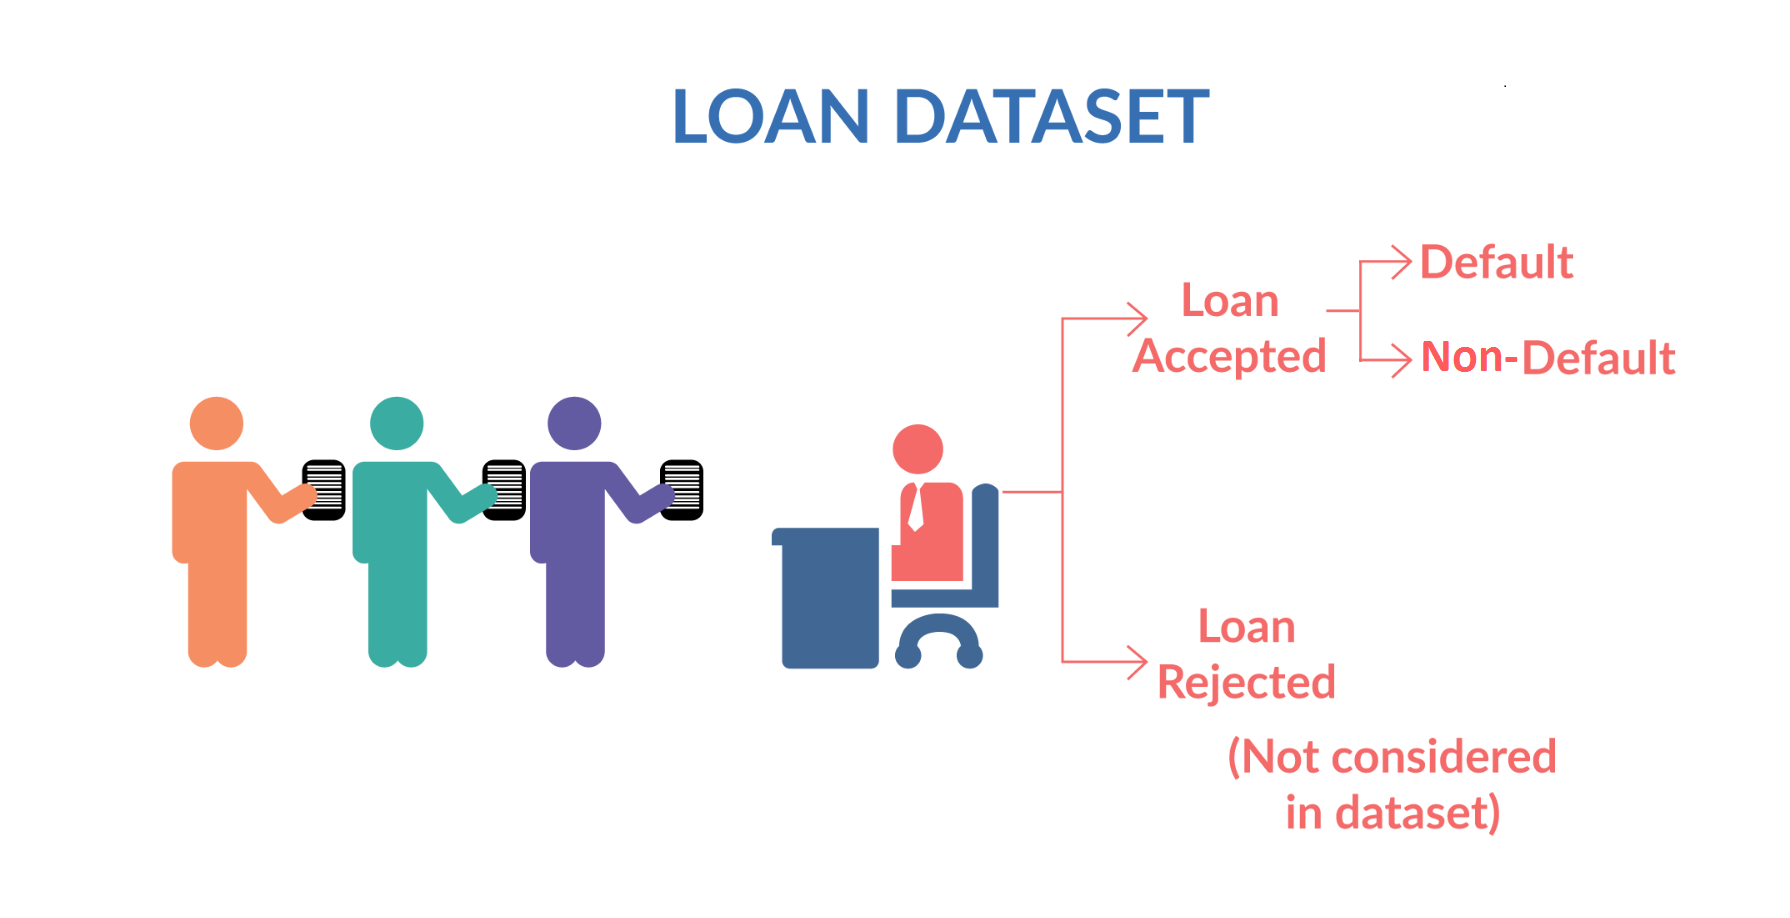

# Load data

In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/abhishek14398/loan-dataset/versions/1"

loan_data = pd.read_csv(f"{dataset_path}/loan.csv")

In [ ]:
# Check the size, information, and data type of the DataFrame
print("---- Size of the DataFrame ----")
print(f"Shape of the DataFrame: {loan_data.shape}")
print("---------------------------------------------------")

print("---- Detailed information about DataFrame ----")
loan_data.info()
print("---------------------------------------------------")

print("---- Types of Column ----")
print(loan_data.dtypes)
print("---------------------------------------------------")

# Check if the file is read and converted to a DataFrame
if isinstance(loan_data, pd.DataFrame):
    print("✅ The file has been successfully read and converted into a DataFrame.")
else:
    print("❌ Error: The file is not a valid DataFrame.")


---- Size of the DataFrame ----
Shape of the DataFrame: (39717, 111)
---------------------------------------------------
---- Detailed information about DataFrame ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
---------------------------------------------------
---- Types of Column ----
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object
---------------------------------------------------
✅ The file has been successfully read and converted into a D

In [ ]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [ ]:
loan_data_dict = pd.read_excel(f"{dataset_path}/Data_Dictionary.xlsx", sheet_name='LoanStats')

loan_data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [ ]:
data_dtypes = pd.DataFrame(loan_data.dtypes,columns = ['dtype'])
data_dtypes.reset_index(inplace = True)
data_dtypes.columns = ['LoanStatNew', 'dtype']
data_dtypes['first value'] = loan_data.loc[0].values

data_dtypes.head(10)


,LoanStatNew,dtype,first value
0,id,int64,1077501
1,member_id,int64,1296599
2,loan_amnt,int64,5000
3,funded_amnt,int64,5000
4,funded_amnt_inv,float64,4975.00
5,term,object,36 months
6,int_rate,object,10.65%
7,installment,float64,162.87
8,grade,object,B
9,sub_grade,object,B2


In [ ]:
# Checking for Duplicate rows in the dataset.
print(loan_data.duplicated(subset=None,keep='first').count())

39717


In [ ]:
# The column used for checking is id column
duplicate_rows=loan_data[loan_data.duplicated(['id'])]
duplicate_rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [ ]:
loan_data.isnull().all(axis=0).sum()

54

In [ ]:
loan_data.dropna(axis=1, how='all',inplace=True)
loan_data


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,...,7274,13.10%,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,...,8847,26.90%,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,...,9698,19.40%,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Ap

#1. Data Understanding and Cleaning:

In [ ]:

col_drop_1=['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','next_pymnt_d','mths_since_last_delinq','mths_since_last_record','url']
loan_data.drop(labels=col_drop_1,axis=1,inplace=True)

In [ ]:
loan_data.shape

(39717, 47)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

## Chạy test data sau bỏ (còn 45 cột)

In [ ]:

column_df = pd.DataFrame(loan_data.columns.tolist(), columns=['Columns'])
merged_df = pd.merge(column_df,loan_data_dict,left_on='Columns', right_on='LoanStatNew', how='left')
pd.set_option('display.max_colwidth', 200)
merged_df[['Columns','Description']]

,Columns,Description
0,id,A unique LC assigned ID for the loan listing.
1,member_id,A unique LC assigned Id for the borrower member.
2,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
5,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,Interest Rate on the loan
7,installment,The monthly payment owed by the borrower if the loan originates.
8,grade,LC assigned loan grade
9,sub_grade,LC assigned loan subgrade


## Bỏ các cột không có nhiều liên quan đến model

In [ ]:

col_drop_2=['id','zip_code','desc','member_id','funded_amnt','funded_amnt_inv','delinq_2yrs','inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',]
loan_data.drop(labels=col_drop_2,axis=1,inplace=True)

## Check data sau khi bỏ các cột không cần thiết (còn 24 cột tất cả)

In [ ]:
#Currently the data has 26 columns left with corresponding mapping descriptions:
column_df = pd.DataFrame(loan_data.columns.tolist(), columns=['Columns'])
merged_df = pd.merge(column_df,loan_data_dict,left_on='Columns', right_on='LoanStatNew', how='left')
pd.set_option('display.max_colwidth', 200)
merged_df[['Columns','Description']]

,Columns,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [ ]:
loan_data.describe()

,loan_amnt,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39020.00
mean,11219.44,324.56,68968.93,13.32,9.29,0.06,13382.53,22.09,0.04
std,7456.67,208.87,63793.77,6.68,4.40,0.24,15885.02,11.40,0.20
min,500.00,15.69,4000.00,0.00,2.00,0.00,0.00,2.00,0.00
25%,5500.00,167.02,40404.00,8.17,6.00,0.00,3703.00,13.00,0.00
50%,10000.00,280.22,59000.00,13.40,9.00,0.00,8850.00,20.00,0.00
75%,15000.00,430.78,82300.00,18.60,12.00,0.00,17058.00,29.00,0.00
max,35000.00,1305.19,6000000.00,29.99,44.00,4.00,149588.00,90.00,2.00


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  pymnt_plan            39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

In [ ]:
loan_data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,12104.39,8085.73,900.00,5600.00,10000.00,16500.00,35000.00
Current,1140.00,17053.99,8651.05,1000.00,12000.00,15825.00,23000.00,35000.00
Fully Paid,32950.00,10866.46,7199.63,500.00,5200.00,9600.00,15000.00,35000.00


In [ ]:
print(f"GRADE unique: {loan_data.grade.unique()}")
print(f"SUB_GRADE unique: {loan_data.sub_grade.unique()}")

GRADE unique: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
SUB_GRADE unique: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


In [ ]:
loan_data['home_ownership'].value_counts()

,count
home_ownership,
RENT,18899
MORTGAGE,17659
OWN,3058
OTHER,98
NONE,3


In [ ]:
loan_data.loc[(loan_data.home_ownership == 'ANY') | (loan_data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
loan_data.home_ownership.value_counts()

,count
home_ownership,
RENT,18899
MORTGAGE,17659
OWN,3058
OTHER,101


In [ ]:
loan_data.loc[loan_data['home_ownership']=='OTHER', 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,83
Charged Off,18


In [ ]:
print((loan_data[loan_data.annual_inc >= 250000].shape[0] / loan_data.shape[0]) * 100)
print((loan_data[loan_data.annual_inc >= 1000000].shape[0] / loan_data.shape[0]) * 100)

0.8736812951632802
0.0352493894302188


In [ ]:
loan_data.loc[loan_data.annual_inc >= 1000000, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,13
Charged Off,1


In [ ]:
loan_data.loc[loan_data.annual_inc >= 250000, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,301
Charged Off,35
Current,11


In [ ]:
print(loan_data.emp_title.isna().sum())
print(loan_data.emp_title.nunique())

2459
28820


In [ ]:
loan_data['emp_title'].value_counts()[:20]

,count
emp_title,
US Army,134
Bank of America,109
IBM,66
AT&T,59
Kaiser Permanente,56
Wells Fargo,54
USAF,54
UPS,53
US Air Force,52


In [ ]:
loan_data['earliest_cr_line'].value_counts()

,count
earliest_cr_line,
Nov-98,370
Oct-99,366
Dec-98,348
Oct-00,346
Dec-97,329
...,...
Feb-66,1
Dec-61,1
Oct-54,1


In [ ]:
loan_data.title.isna().sum()

11

In [ ]:
loan_data['title'] = loan_data.title.str.lower()

In [ ]:
loan_data.title.value_counts()[:10]

,count
title,
debt consolidation,3082
debt consolidation loan,1866
personal loan,986
consolidation,737
home improvement,543
personal,543
credit card consolidation,483
credit card loan,357
small business loan,356


In [ ]:
loan_data.dti.value_counts()

,count
dti,
0.00,183
12.00,51
18.00,45
19.20,40
13.20,39
...,...
29.13,1
25.31,1
29.76,1


In [ ]:
print(loan_data[loan_data['dti']>=40].shape)

(0, 27)


In [ ]:
loan_data.loc[loan_data['dti']>=29, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,80
Charged Off,11
Current,7


In [ ]:
print(loan_data.shape)
print(loan_data[loan_data.open_acc > 40].shape)

(39717, 27)
(3, 27)


In [ ]:
print(loan_data.shape)
print(loan_data[loan_data.total_acc > 80].shape)

(39717, 27)
(3, 27)


In [ ]:
# Loại bỏ ký hiệu '%' và chuyển đổi sang float
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '').astype(float)


In [ ]:
print(loan_data.shape)
print(loan_data[loan_data.revol_util > 120].shape)

(39717, 27)
(0, 27)


In [ ]:
loan_data[loan_data.revol_util > 99]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies
408,23000,60 months,21.28%,625.86,F,F2,Department of Defense,8 years,MORTGAGE,95000.00,Verified,Dec-11,Fully Paid,n,debt_consolidation,debt free forever,MI,8.94,Jul-01,9,0,9826,99.30,35,f,INDIVIDUAL,0.00
412,1500,36 months,18.64%,54.72,E,E1,Willowood Care Center,< 1 year,RENT,17000.00,Source Verified,Dec-11,Charged Off,n,other,personal,OH,4.59,Sep-07,10,0,1497,99.80,15,f,INDIVIDUAL,0.00
748,4400,36 months,19.03%,161.36,E,E2,NY Dept of Sanitation,7 years,RENT,80000.00,Verified,Dec-11,Fully Paid,n,small_business,personal business loan,NY,2.65,Mar-04,4,0,6043,99.10,13,f,INDIVIDUAL,0.00
782,13000,36 months,20.30%,485.12,E,E5,gap inc,5 years,RENT,42000.00,Not Verified,Dec-11,Charged Off,n,debt_consolidation,smart,OH,7.69,Sep-06,5,0,11612,99.50,5,f,INDIVIDUAL,0.00
855,3600,36 months,16.29%,127.09,D,D1,LEDIC Management Group,6 years,RENT,45000.00,Source Verified,Dec-11,Fully Paid,n,major_purchase,unexpected expense,GA,22.05,Jun-04,6,0,7947,99.30,22,f,INDIVIDUAL,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37585,8875,36 months,15.68%,310.64,E,E1,Jakes Fireworks,< 1 year,MORTGAGE,29124.00,Source Verified,Feb-09,Fully Paid,n,debt_consolidation,need lower interest and payments,KS,19.53,Nov-98,7,0,21894,99.50,34,f,INDIVIDUAL,0.00
37887,4000,36 months,15.05%,138.77,D,D4,ShearsAdkins Architects,2 years,MORTGAGE,56500.00,Not Verified,Jan-09,Fully Paid,n,debt_consolidation,credit payoff,CO,12.70,Sep-98,6,1,3864,99.10,15,f,INDIVIDUAL,1.00
38177,10000,36 months,13.67%,340.18,D,D2,Bristol-Myers Squibb Company,2 years,RENT,250000.00,Not Verified,Nov-08,Fully Paid,n,debt_consolidation,clear visa wachovia,NY,10.51,Dec-97,8,0,89156,99.20,19,f,INDIVIDUAL,0.00
38431,7000,36 months,15.38%,243.97,E,E4,Alpha Ecological Pest Control,6 years,MORTGAGE,80000.00,Not Verified,Sep-08,Charged Off,n,credit_card,debt consolidation,AZ,9.24,Sep-90,9,1,33102,99.40,19,f,INDIVIDUAL,0.00


In [ ]:
print(loan_data.shape)
print(loan_data[loan_data.revol_bal > 25000].shape)

(39717, 27)
(5362, 27)


In [ ]:
loan_data.loc[loan_data.revol_bal > 25000, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,4363
Charged Off,782
Current,217


<Axes: xlabel='home_ownership', ylabel='count'>

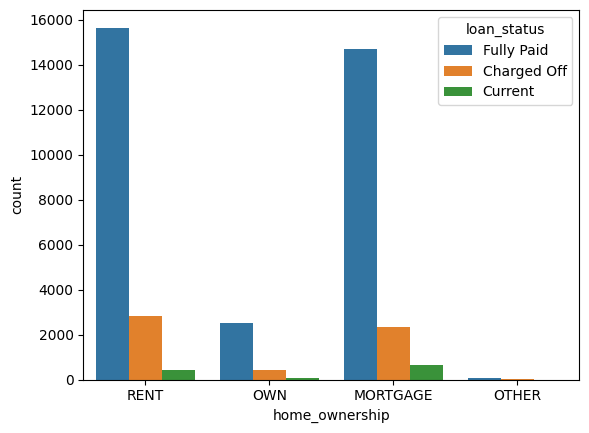

In [ ]:
sns.countplot(x = 'home_ownership',hue = 'loan_status',data = loan_data)

In [ ]:
# Xử lý home_ownership như đã đề cập ở trên:

loan_data['home_ownership'] = loan_data['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE','ANY'] else x)

In [ ]:
loan_data['verification_status'].value_counts()

,count
verification_status,
Not Verified,16921
Verified,12809
Source Verified,9987


<Axes: xlabel='verification_status', ylabel='count'>

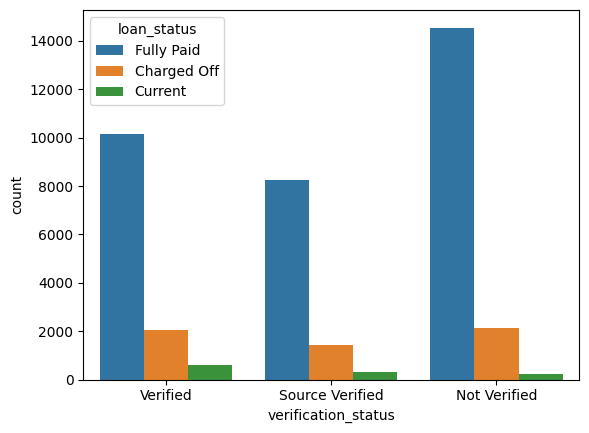

In [ ]:
sns.countplot(x = 'verification_status', hue = 'loan_status',data = loan_data)

In [ ]:
print(loan_data['pymnt_plan'].value_counts())
loan_data.drop('pymnt_plan',axis = 1,inplace = True)

pymnt_plan
n    39717
Name: count, dtype: int64


In [ ]:
print("Unique values in purpose column:", loan_data['purpose'].nunique())
loan_data['purpose'].value_counts()

Unique values in purpose column: 14


,count
purpose,
debt_consolidation,18641
credit_card,5130
other,3993
home_improvement,2976
major_purchase,2187
small_business,1828
car,1549
wedding,947
medical,693


In [ ]:
def DefaultRates_Columns(col_name):
    """
    Calculates the default rate for each unique value in the specified column,
    and returns a DataFrame with the column's unique values, their default rates, and counts.

    Args:
        col_name (str): The name of the column to analyze.

    Returns:
        pandas.DataFrame: A DataFrame with the column's unique values, their default rates, and counts.
    """
    # Calculate the default rate
    default_rates = loan_data.groupby(col_name)['loan_status'].apply(lambda x: (x == 'Charged Off').sum() / len(x))

    # Count the number of rows for each unique value in the column
    counts = loan_data[col_name].value_counts()

    # Create a DataFrame for better visualization
    result_df = default_rates.reset_index()  # Reset the index to convert it to columns
    result_df.columns = [col_name, f'{col_name}_Default_Rate']  # Rename the columns

    # Map the counts to the DataFrame
    result_df['Count'] = result_df[col_name].map(counts)

    return result_df


In [ ]:
DefaultRates_Columns('purpose')

,purpose,purpose_Default_Rate,Count
0,car,0.10,1549
1,credit_card,0.11,5130
2,debt_consolidation,0.15,18641
3,educational,0.17,325
4,home_improvement,0.12,2976
5,house,0.15,381
6,major_purchase,0.10,2187
7,medical,0.15,693
8,moving,0.16,583
9,other,0.16,3993


Cột 'addr_state' chứa dữ liệu của 50 tiểu bang. Việc tạo 49 biến giả (dummy variables) cho từng tiểu bang là không hiệu quả. Vì vậy, ta sẽ tiến hành phân tích chi tiết cho 'addr_state'.

Một số tiểu bang có số lượng hồ sơ vay rất ít, nên ta chỉ tập trung vào những tiểu bang có hơn 1.000 hồ sơ vay.Ta sẽ tính toán default rate cho từng tiểu bang và phân tích default rate theo từng năm tại các tiểu bang đó.

Kết quả phân tích:

NE: bang này chỉ có 5 hồ sơ vay nhưng default rate cực kì cao (0.6)

FL, SD, AK, NV: Các tiểu bang này có default rate cao.

CA, NY: Default rate ở mức trung bình, nhưng số lượng hồ sơ vay rất lớn.

WY, DC, DE: Các tiểu bang này thường có Default rate thấp hơn.

Dựa trên phân tích này, chỉ tạo các biến giả cho các tiểu bang sau: 'NE', 'FL', 'SD', 'AK', 'NV', 'CA', 'NY', 'WY', 'DC', 'DE'

In [ ]:
print("Values in State:", loan_data['addr_state'].nunique())
loan_data['addr_state'].value_counts()

Values in State: 50


,count
addr_state,
CA,7099
NY,3812
FL,2866
TX,2727
NJ,1850
IL,1525
PA,1517
VA,1407
GA,1398


In [ ]:
DefaultRates_States = DefaultRates_Columns('addr_state').sort_values(by='addr_state_Default_Rate')
DefaultRates_States

,addr_state,addr_state_Default_Rate,Count
21,ME,0.00,3
15,IN,0.00,9
12,IA,0.00,5
49,WY,0.05,83
7,DC,0.07,214
8,DE,0.11,114
25,MS,0.11,19
2,AR,0.11,245
45,VT,0.11,54
16,KS,0.11,271


In [ ]:
KeepStates=['NE','FL','SD','AK','NV','CA','NY','WY','DC', 'DE']

#Create dummy variables for these states
for i in KeepStates:
    loan_data['state'+i] = loan_data['addr_state'].apply(lambda x: 1 if x == i else 0)

initial_list_status
f    39717
Name: count, dtype: int64


<Axes: xlabel='initial_list_status', ylabel='count'>

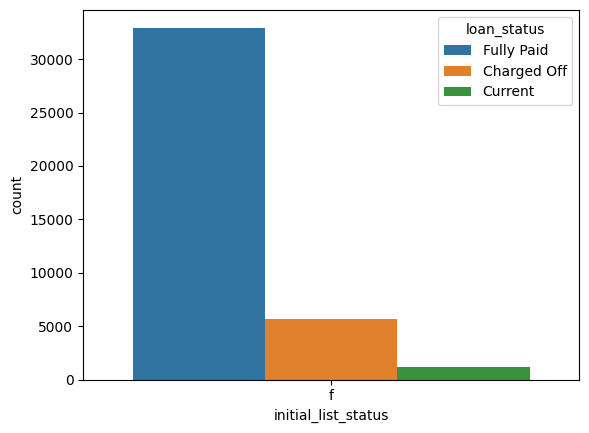

In [ ]:
print(loan_data['initial_list_status'].value_counts())
sns.countplot(x = 'initial_list_status', hue = 'loan_status',data = loan_data)

In [ ]:
#Change 'issue_d' and 'earliest_cr_line ' to datetime
from datetime import datetime as dt
# Changed the format string to '%d-%b-%y' to handle the two-digit year
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x:dt.strptime('01-'+x,'%d-%b-%y').date())
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x:dt.strptime('01-'+x,'%d-%b-%y').date())

In [ ]:
loan_data['earliest_cr_line'] = loan_data['issue_d']- loan_data['earliest_cr_line']
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x:int(str(x).split(' ')[0]))

In [ ]:
#Divide 'annual_inc' and 'revol_bal' by 'loan_amnt'
tmp=['annual_inc','revol_bal']
for col in tmp:
    loan_data[col] = loan_data[col] / loan_data['loan_amnt']

In [ ]:
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype(float)

<Axes: xlabel='int_rate'>

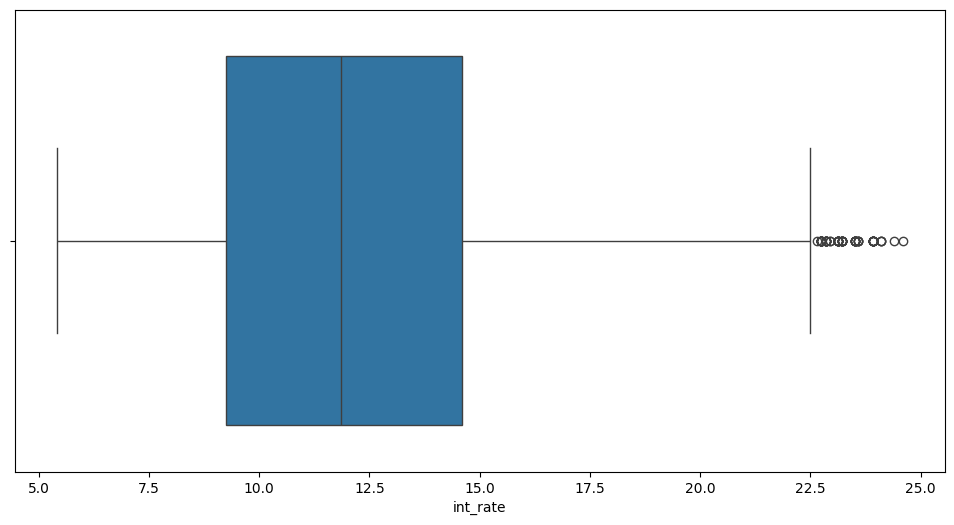

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.boxplot(x = 'int_rate',data = loan_data,ax = ax)

In [ ]:
loan_data[loan_data['int_rate']>2.55]['loan_status'].value_counts()

,count
loan_status,
Fully Paid,32950
Charged Off,5627
Current,1140


<Axes: xlabel='int_rate', ylabel='Density'>

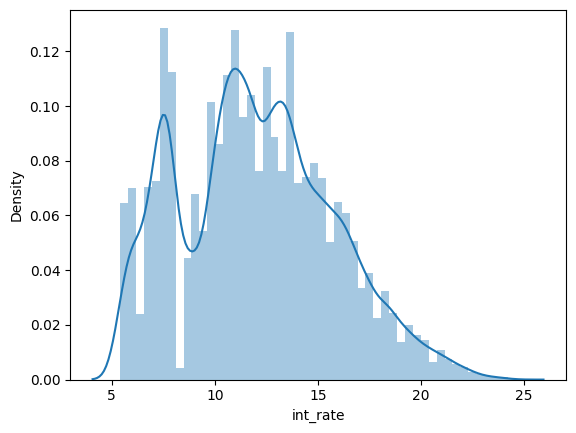

In [ ]:
sns.distplot(loan_data['int_rate'])

<Axes: xlabel='int_rate', ylabel='Density'>

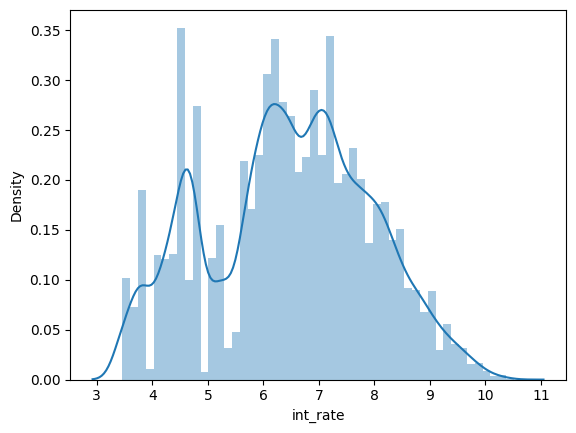

In [ ]:
sns.distplot(loan_data['int_rate'].apply(lambda x: np.log1p(x)**2))

In [ ]:
loan_data['int_rate']=loan_data['int_rate'].apply(lambda x: np.log1p(x)**2)


<Axes: xlabel='dti'>

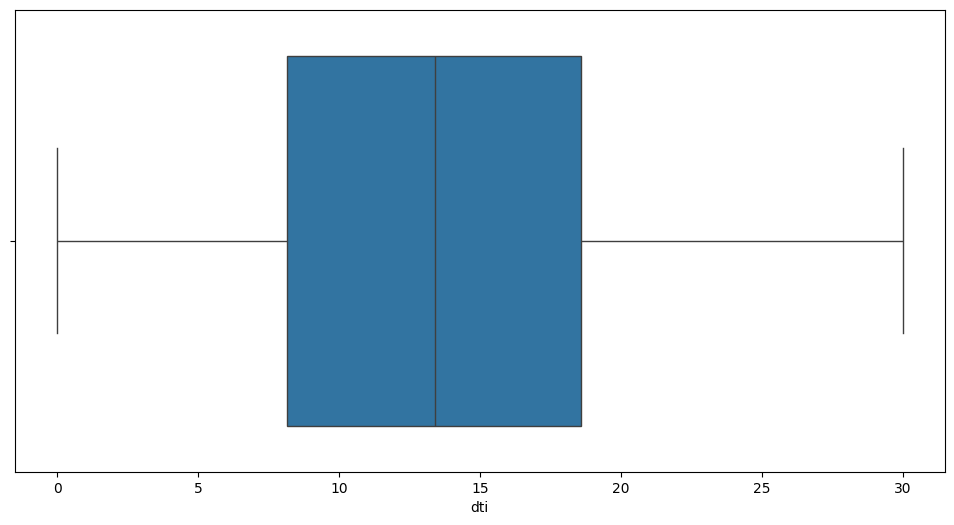

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.boxplot(x='dti',data=loan_data,ax=ax)

DTI không có outlier

Đây là cách ta đã xử lý các giá trị ngoại lai trong dữ liệu. Một số điểm chính là:

Các trường hợp có tỷ lệ nợ xấu cao quá ít để rút ra bất kỳ kết luận nào.

Khi số lượng yêu cầu tín dụng tăng lên, ta có thể thấy default rate cũng tăng theo. Tuy nhiên, các giá trị 'inq_last_6mths' cao lại có rất ít trường hợp.

Tương tự với 'open_acc', các giá trị cao có rất ít trường hợp.

Các giá trị 'revol_bal' cao có ít người nợ xấu. Tuy nhiên, các giá trị này phân tán nhiều sau mức 40.

#2.  Data Preprocessing

In [ ]:
print(f"The Length of the data: {loan_data.shape}")

The Length of the data: (39717, 36)


In [ ]:
# Check missing value
for column in loan_data.columns:
    if loan_data[column].isna().sum() != 0:
        missing = loan_data[column].isna().sum()
        portion = (missing / loan_data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '2459' ==> '6.191%'
'emp_length': number of missing values '1075' ==> '2.707%'
'title': number of missing values '11' ==> '0.028%'
'revol_util': number of missing values '50' ==> '0.126%'
'pub_rec_bankruptcies': number of missing values '697' ==> '1.755%'


In [ ]:
loan_data.emp_title.nunique()

28820

In [ ]:
loan_data.drop('emp_title', axis=1, inplace=True)

In [ ]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
for year in loan_data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{loan_data[loan_data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
loan_status
Fully Paid    0.81
Charged Off   0.15
Current       0.04
Name: proportion, dtype: float64
< 1 year years in this position:
loan_status
Fully Paid    0.84
Charged Off   0.14
Current       0.02
Name: proportion, dtype: float64
1 year years in this position:
loan_status
Fully Paid    0.84
Charged Off   0.14
Current       0.02
Name: proportion, dtype: float64
3 years years in this position:
loan_status
Fully Paid    0.84
Charged Off   0.14
Current       0.02
Name: proportion, dtype: float64
8 years years in this position:
loan_status
Fully Paid    0.83
Charged Off   0.14
Current       0.03
Name: proportion, dtype: float64
9 years years in this position:
loan_status
Fully Paid    0.85
Charged Off   0.13
Current       0.03
Name: proportion, dtype: float64
4 years years in this position:
loan_status
Fully Paid    0.84
Charged Off   0.13
Current       0.03
Name: proportion, dtype: float64
5 years years in this position:
loan_status
Fully Paid    0.

In [ ]:
loan_data.drop('emp_length', axis=1, inplace=True)

In [ ]:
loan_data.title.value_counts().head()

,count
title,
debt consolidation,3082
debt consolidation loan,1866
personal loan,986
consolidation,737
home improvement,543


In [ ]:
loan_data.purpose.value_counts().head()

,count
purpose,
debt_consolidation,18641
credit_card,5130
other,3993
home_improvement,2976
major_purchase,2187


In [ ]:
loan_data.drop('title', axis=1, inplace=True)

In [ ]:
for column in loan_data.columns:
    if loan_data[column].isna().sum() != 0:
        missing = loan_data[column].isna().sum()
        portion = (missing / loan_data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '50' ==> '0.126%'
'pub_rec_bankruptcies': number of missing values '697' ==> '1.755%'


In [ ]:
loan_data.dropna(inplace=True)

In [ ]:
loan_data.shape

(38970, 33)

In [ ]:
print([column for column in loan_data.columns if loan_data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']


In [ ]:
loan_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
loan_data['term'] = loan_data.term.map(term_values)

In [ ]:
loan_data.term.unique()

array([36, 60])

In [ ]:
loan_data.drop('grade', axis=1, inplace=True)

In [ ]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
loan_data = pd.get_dummies(loan_data, columns=dummies, drop_first=True)

In [ ]:
loan_data.drop('issue_d', axis=1, inplace=True)

In [ ]:
print(loan_data['earliest_cr_line'].dtype)


int64


In [ ]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], errors='coerce')


In [ ]:
loan_data['earliest_cr_line'] = loan_data.earliest_cr_line.dt.year

In [ ]:
loan_data.earliest_cr_line.nunique()

2

In [ ]:
loan_data.earliest_cr_line.value_counts()

,count
earliest_cr_line,
1970,38882
1969,88


In [ ]:
loan_data.drop('addr_state', axis=1, inplace=True)

In [ ]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']

In [ ]:
print(loan_data['loan_status'].unique())

['Fully Paid' 'Charged Off']


In [ ]:
mapping = {
    "Fully Paid": 0,
    "Charged Off": 1,
}
loan_data['loan_status'] = loan_data['loan_status'].map(mapping)

In [ ]:
print([column for column in loan_data.columns if loan_data[column].dtype == object])

[]


In [ ]:
#print(f"Data shape: {loan_data.shape}")

# Remove duplicate Features
#data = loan_data.T.drop_duplicates()
#data = data.T

 # Remove Duplicate Rows
#data.drop_duplicates(inplace=True)

#print(f"Data shape: {data.shape}")

#Data shape: (38970, 76)
#Data shape: (38970, 76)

In [ ]:
w_p = loan_data.loan_status.value_counts()[0] / loan_data.shape[0]
w_n = loan_data.loan_status.value_counts()[1] / loan_data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.8547977795400475
Weight of negative values 0.14520222045995243


In [ ]:
train, test = train_test_split(loan_data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(25346, 75)
(12484, 75)


In [ ]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(25346, 75)
(25346, 75)


In [ ]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(25346, 75)
(25342, 75)


In [ ]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [ ]:
X_train.dtypes

,0
loan_amnt,int64
term,int64
int_rate,float64
installment,float64
annual_inc,float64
...,...
purpose_small_business,bool
purpose_vacation,bool
purpose_wedding,bool
home_ownership_OWN,bool


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

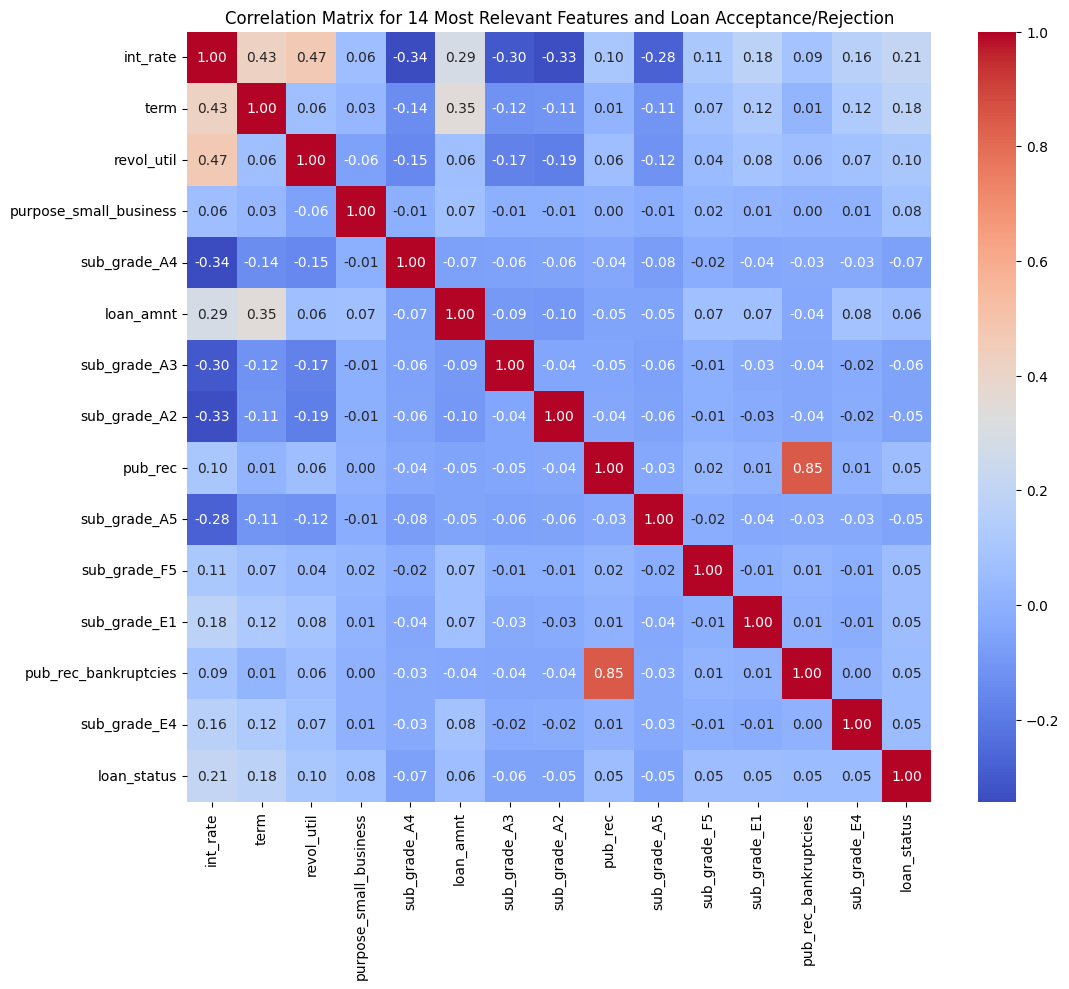

In [ ]:
# Tạo bản sao dữ liệu
loan_data_copy = loan_data.copy()
target_column = 'loan_status'

# Chuyển đổi loan_status thành giá trị số nếu cần
if loan_data_copy[target_column].dtype == 'object':
    loan_data_copy[target_column] = loan_data_copy[target_column].map({'Accepted': 1, 'Rejected': 0})

# Tính toán hệ số tương quan giữa tất cả các cột và loan_status
correlation_with_target = loan_data_copy.corr()[target_column].abs().sort_values(ascending=False)

# Lấy 14 cột liên quan nhất (bỏ qua chính loan_status)
top_14_columns = correlation_with_target.index[1:15].tolist()

# Lọc dữ liệu chỉ với các cột này
loan_data_subset = loan_data_copy[top_14_columns + [target_column]].copy()

# Tính toán ma trận tương quan cho các cột đã chọn
correlation_matrix = loan_data_subset.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for 14 Most Relevant Features and Loan Acceptance/Rejection")
plt.show()

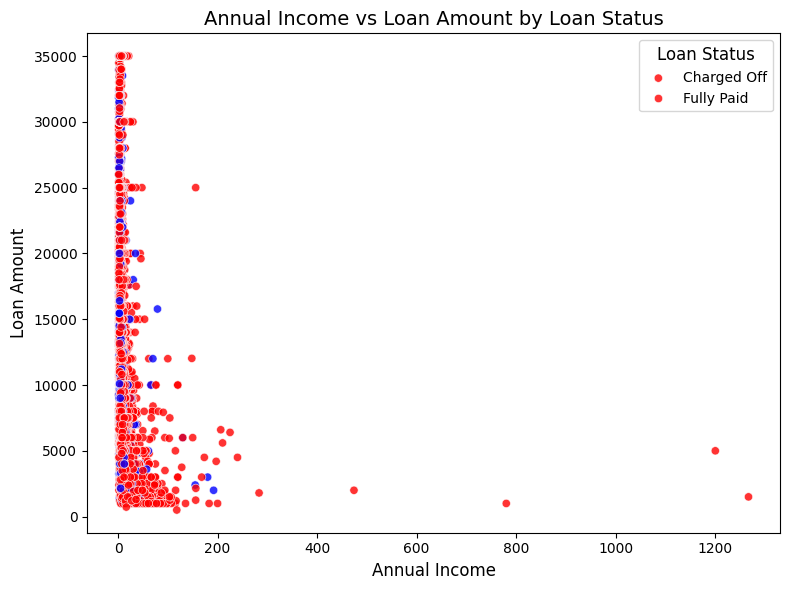

In [ ]:
# Vẽ biểu đồ scatterplot với màu sắc được đảm bảo
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=loan_data_copy,
    x='annual_inc',  # Thu nhập hàng năm
    y='loan_amnt',  # Số tiền vay
    hue='loan_status',  # Tình trạng vay
    palette={0: 'red', 1: 'blue'},  # Đảm bảo bảng màu
    alpha=0.8  # Độ trong suốt để màu sắc dễ nhận biết
)

# Thêm tiêu đề và nhãn
plt.title('Annual Income vs Loan Amount by Loan Status', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

# Cập nhật legend
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'], fontsize=10, title_fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#3. Model Building

In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [ ]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns,
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - AUC: 0.5800 - loss: 0.5101 - val_AUC: 0.6417 - val_loss: 0.4215
Epoch 2/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6613 - loss: 0.4018 - val_AUC: 0.6548 - val_loss: 0.4061
Epoch 3/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6842 - loss: 0.3887 - val_AUC: 0.6680 - val_loss: 0.4157
Epoch 4/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.6903 - loss: 0.3891 - val_AUC: 0.6662 - val_loss: 0.3977
Epoch 5/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7015 - loss: 0.3808 - val_AUC: 0.6736 - val_loss: 0.4133
Epoch 6/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7065 - loss: 0.3810 - val_AUC: 0.6767 - val_loss: 0.3988
Epoch 7/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.7120 - loss: 0.3738 - val_AUC: 0.6670 - val_loss: 0.4009
Epoch 8/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7099 - loss: 0.3735 - val_AUC: 0.6668 - val_loss: 0.4050
Epoch 9/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AU

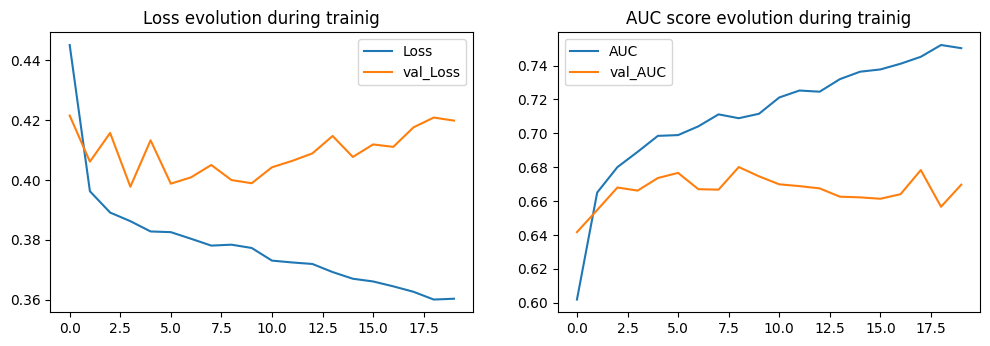

In [ ]:
plot_learning_evolution(r)

In [ ]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Result:
Accuracy Score: 86.72%
_______________________________________________
CLASSIFICATION REPORT:
               0.0     1.0  accuracy  macro avg  weighted avg
precision     0.88    0.64      0.87       0.76          0.84
recall        0.98    0.18      0.87       0.58          0.87
f1-score      0.93    0.29      0.87       0.61          0.83
support   21675.00 3667.00      0.87   25342.00      25342.00
_______________________________________________
Confusion Matrix: 
 [[21302   373]
 [ 2993   674]]



In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Result:
Accuracy Score: 84.13%
_______________________________________________
CLASSIFICATION REPORT:
               0.0     1.0  accuracy  macro avg  weighted avg
precision     0.86    0.35      0.84       0.61          0.79
recall        0.97    0.10      0.84       0.53          0.84
f1-score      0.91    0.15      0.84       0.53          0.80
support   10658.00 1826.00      0.84   12484.00      12484.00
_______________________________________________
Confusion Matrix: 
 [[10322   336]
 [ 1645   181]]



In [ ]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# param_grid = dict(
#     n_estimators=stats.randint(10, 500),
#     max_depth=stats.randint(1, 10),
#     learning_rate=stats.uniform(0, 1)
# )

xgb_clf = XGBClassifier(use_label_encoder=False)
# xgb_cv = RandomizedSearchCV(
#     xgb_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# xgb_cv.fit(X_train, y_train)

# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# # best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
# print(f"Best Parameters: {best_params}")

# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 90.87%
_______________________________________________
CLASSIFICATION REPORT:
               0.0     1.0  accuracy  macro avg  weighted avg
precision     0.90    0.98      0.91       0.94          0.92
recall        1.00    0.38      0.91       0.69          0.91
f1-score      0.95    0.54      0.91       0.75          0.89
support   21675.00 3667.00      0.91   25342.00      25342.00
_______________________________________________
Confusion Matrix: 
 [[21651    24]
 [ 2289  1378]]

Test Result:
Accuracy Score: 84.81%
_______________________________________________
CLASSIFICATION REPORT:
               0.0     1.0  accuracy  macro avg  weighted avg
precision     0.86    0.40      0.85       0.63          0.79
recall        0.98    0.08      0.85       0.53          0.85
f1-score      0.92    0.13      0.85       0.52          0.80
support   10658.00 1826.00      0.85   12484.00      12484.00
_______________________________________________
Confusion Matrix:

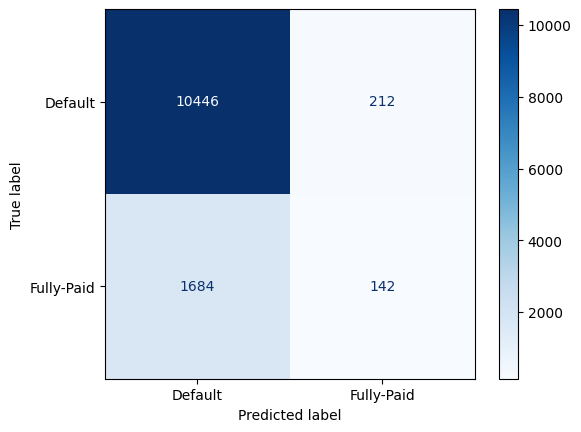

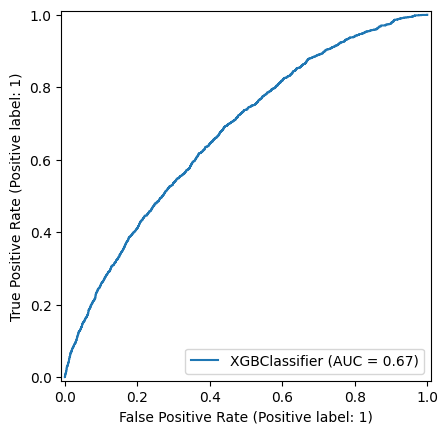

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

In [ ]:
# param_grid = dict(
#     n_estimators=stats.randint(100, 1500),
#     max_depth=stats.randint(10, 100),
#     min_samples_split=stats.randint(1, 10),
#     min_samples_leaf=stats.randint(1, 10),
# )

rf_clf = RandomForestClassifier(n_estimators=100)
# rf_cv = RandomizedSearchCV(
#     rf_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best Parameters: {best_params}")
# rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0     1.0  accuracy  macro avg  weighted avg
precision     1.00    1.00      1.00       1.00          1.00
recall        1.00    1.00      1.00       1.00          1.00
f1-score      1.00    1.00      1.00       1.00          1.00
support   21675.00 3667.00      1.00   25342.00      25342.00
_______________________________________________
Confusion Matrix: 
 [[21675     0]
 [    0  3667]]

Test Result:
Accuracy Score: 85.30%
_______________________________________________
CLASSIFICATION REPORT:
               0.0     1.0  accuracy  macro avg  weighted avg
precision     0.86    0.44      0.85       0.65          0.79
recall        1.00    0.02      0.85       0.51          0.85
f1-score      0.92    0.03      0.85       0.48          0.79
support   10658.00 1826.00      0.85   12484.00      12484.00
_______________________________________________
Confusion Matrix

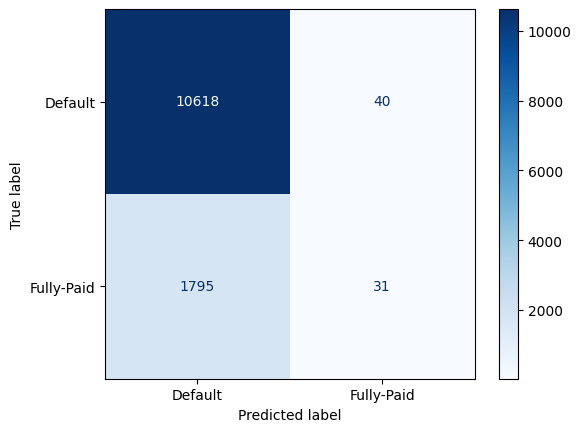

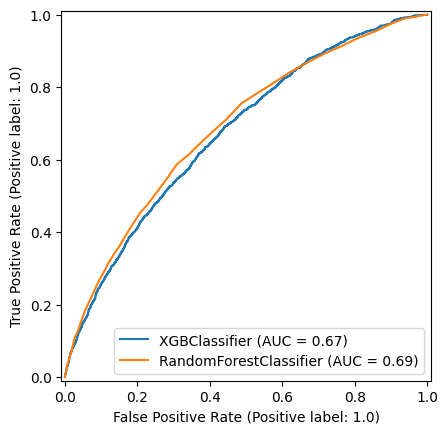

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

In [ ]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400,
    title="ROC Scores of ML Models", xlabel="ROC Scores",
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)

Trial 10 Complete [00h 01m 04s]
val_AUC: 0.6820083856582642

Best val_AUC So Far: 0.6994529366493225
Total elapsed time: 00h 14m 12s

Số lớp ẩn: 2
Units mỗi lớp: [150, 200]
Dropout rates: [0.0]  # Dropout đầu tiên
Dropout rates các lớp ẩn: [0.1, 0.4]
Learning rate: 0.01

{'dropout_1': 0.0, 'num_layers': 2, 'units_0': 150, 'dropout_2': 0.1, 'learning_rate': 0.01, 'units_1': 200, 'dropout_3': 0.4, 'units_2': 100, 'dropout_4': 0.0, 'units_3': 100, 'dropout_5': 0.4}
Epoch 1/30
792/792 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6077 - loss: 0.4654 - val_AUC: 0.6812 - val_loss: 0.3987
Epoch 2/30
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6760 - loss: 0.3909 - val_AUC: 0.6861 - val_loss: 0.3962
Epoch 3/30
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6916 - loss: 0.3864 - val_AUC: 0.6929 - val_loss: 0.3979
Epoch 4/30
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6812 - loss: 0.3920 - val_AUC: 0.6934 - val_loss: 0.3889
Epoch 5/30
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.

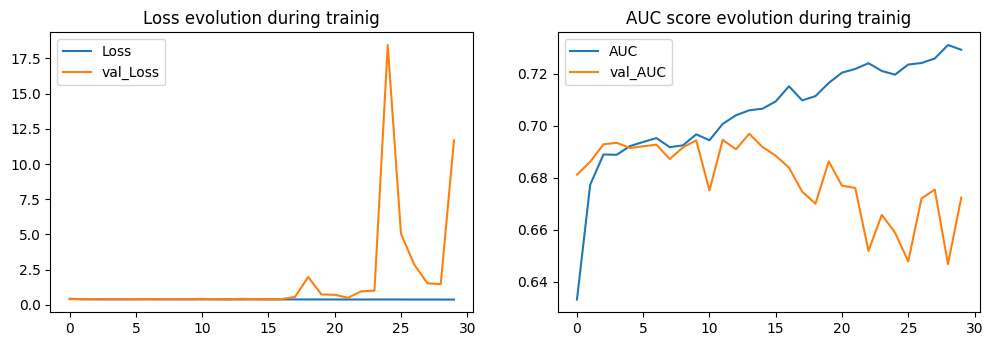

In [ ]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Input
from tensorflow.keras.models import Model

# Hàm xây dựng mô hình cho Keras Tuner
def build_nn_model(hp):
    inp = Input(shape=(num_columns,))
    x = BatchNormalization()(inp)
    x = Dropout(hp.Float('dropout_1', 0.0, 0.5, step=0.1))(x)

    # Thử nghiệm số lớp ẩn và số nút
    for i in range(hp.Int('num_layers', 1, 4)):  # Số lớp ẩn từ 1 đến 4
        x = Dense(
            units=hp.Int(f'units_{i}', min_value=50, max_value=200, step=50),
            activation='relu'
        )(x)
        x = BatchNormalization()(x)
        x = Dropout(hp.Float(f'dropout_{i + 2}', 0.0, 0.5, step=0.1))(x)

    x = Dense(num_labels, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=[AUC(name='AUC')]
    )
    return model

# Sử dụng Keras Tuner để tìm kiếm siêu tham số tối ưu
tuner = kt.RandomSearch(
    build_nn_model,
    objective='val_AUC',  # Mục tiêu tối ưu là AUC trên tập validation
    max_trials=10,  # Số lượng mô hình thử nghiệm
    executions_per_trial=1,  # Số lần lặp lại mỗi thử nghiệm
    directory='ann_hyperparam_tuning',
    project_name='loan_data_nn'
)

# Tìm kiếm siêu tham số
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Lấy siêu tham số tốt nhất
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# In hàm get_best_hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Sửa code in kết quả để khớp với định nghĩa tham số trong `build_nn_model`
print(f"""
Số lớp ẩn: {best_hps.get('num_layers')}
Units mỗi lớp: {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_layers'))]}
Dropout rates: {[best_hps.get(f'dropout_1')]}  # Dropout đầu tiên
Dropout rates các lớp ẩn: {[best_hps.get(f'dropout_{i + 2}') for i in range(best_hps.get('num_layers'))]}
Learning rate: {best_hps.get('learning_rate')}
""")
# Kiểm tra tất cả các tham số đã lưu trong best_hps
print(best_hps.values)

# Huấn luyện lại mô hình với siêu tham số tối ưu
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)

# Đánh giá mô hình tốt nhất trên tập test
results = best_model.evaluate(X_test, y_test)
print(f"Test AUC: {results[1]:.4f}")

# Vẽ biểu đồ học tập
plot_learning_evolution(history)


Epoch 1/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.6095 - loss: 0.4731 - val_AUC: 0.6695 - val_loss: 0.3944
Epoch 2/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6818 - loss: 0.3922 - val_AUC: 0.6893 - val_loss: 0.3934
Epoch 3/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6831 - loss: 0.3877 - val_AUC: 0.6898 - val_loss: 0.3953
Epoch 4/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6864 - loss: 0.3859 - val_AUC: 0.6953 - val_loss: 0.3863
Epoch 5/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6957 - loss: 0.3820 - val_AUC: 0.6947 - val_loss: 0.3898
Epoch 6/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.6977 - loss: 0.3796 - val_AUC: 0.6952 - val_loss: 0.3865
Epoch 7/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6996 - loss: 0.3869 - val_AUC: 0.6940 - val_loss: 0.3955
Epoch 8/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6932 - loss: 0.3856 - val_AUC: 0.6919 - val_loss: 0.4153
Epoch 9/20
792/792 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AU

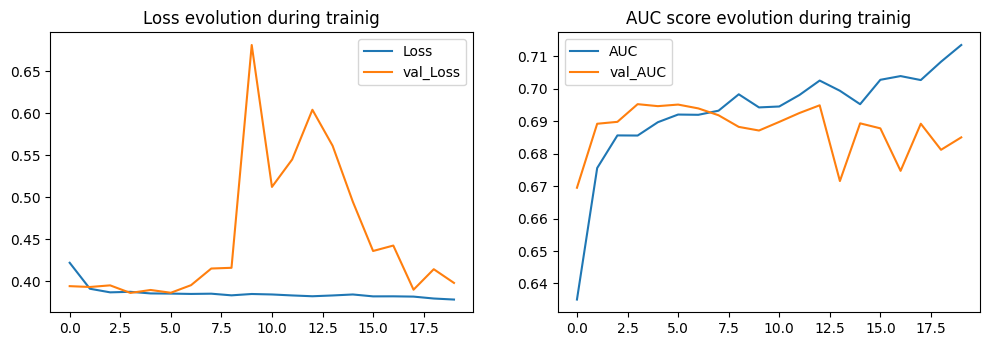

In [ ]:
def tuned_nn_model(num_columns, num_labels, best_hps):
    inp = tf.keras.layers.Input(shape=(num_columns,))
    x = BatchNormalization()(inp)
    x = Dropout(best_hps['dropout_1'])(x)  # Dropout đầu vào

    # Thêm các lớp ẩn dựa trên số lượng và units từ best_hps
    for i in range(best_hps['num_layers']):
        x = Dense(best_hps[f'units_{i}'], activation='relu')(x)
        x = BatchNormalization()(x)
        # Chỉ thêm dropout nếu tồn tại key
        if f'dropout_{i+2}' in best_hps:
            x = Dropout(best_hps[f'dropout_{i+2}'])(x)

    x = Dense(num_labels, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate=best_hps['learning_rate']),
                  loss='binary_crossentropy',
                  metrics=[AUC(name='AUC')])
    return model

# Khởi tạo mô hình
num_columns = X_train.shape[1]
num_labels = 1
model = tuned_nn_model(num_columns, num_labels, best_hps)

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

# Vẽ lại quá trình học tập
plot_learning_evolution(history)

# Đánh giá mô hình
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)


# Task 4 : Explainability:

## Feature Importance (cho Random Forest)

In [ ]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


PermutationExplainer explainer: 12485it [30:01,  6.91it/s]


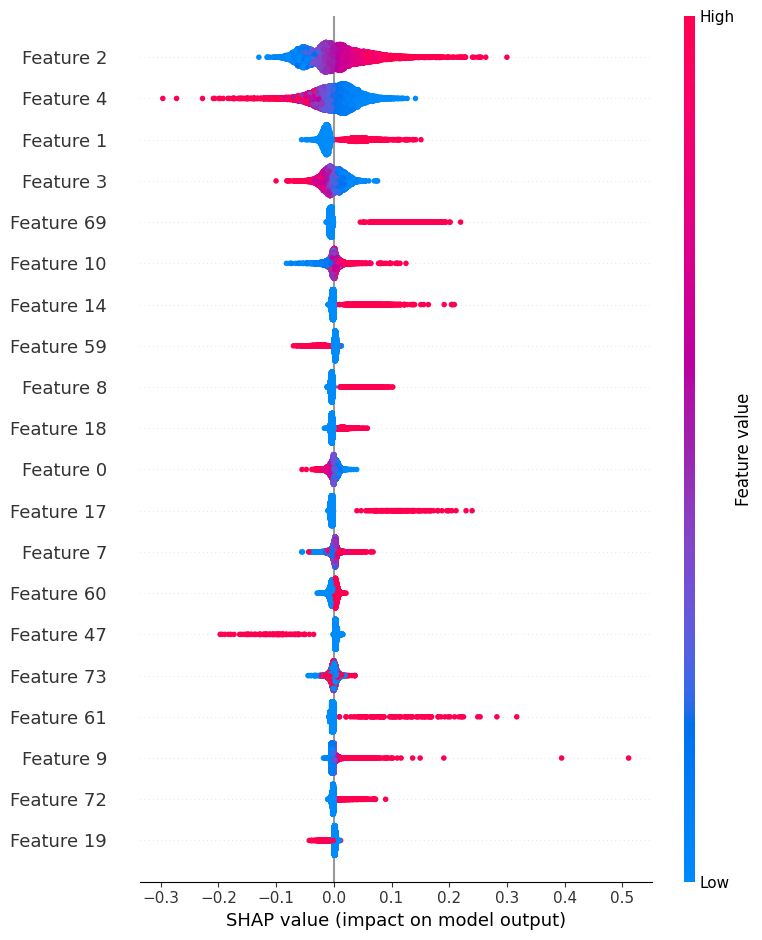

In [ ]:
# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test)

In [ ]:
# Tính giá trị SHAP trung bình tuyệt đối
shap_mean = np.abs(shap_values.values).mean(axis=0)

feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]  # Thay bằng tên cột thật nếu có
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Mean SHAP Value': shap_mean
}).sort_values(by='Mean SHAP Value', ascending=False)

print(feature_importance)


       Feature  Mean SHAP Value
2    feature_2             0.04
4    feature_4             0.03
1    feature_1             0.02
3    feature_3             0.01
69  feature_69             0.01
..         ...              ...
55  feature_55             0.00
15  feature_15             0.00
53  feature_53             0.00
38  feature_38             0.00
13  feature_13             0.00

[74 rows x 2 columns]
